# Varun Satish - ASTR 503 HW 1

In [97]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import astropy as ap
import specreduce
from matplotlib.lines import Line2D

### Even though you are submitting these with `git` and this file tells you to rename it, and you should be pushing to a dedicated folder with your username, please also stick your name in this file here, so there's extra redundancy. 

The point of this assignment is to:
- get comfortable with photon energy, frequency, and wavelength - calculate power and luminosity
- know now to convert magnitudes, fluxes, photon counts.
- start basic Python scripts and plotting

# Q1. Make plot of the electromagnetic spectrum using Python. (30 pts)
- Your plot should have multiple x-axes - one for wavelength (in meters), one for frequency (in Hz), one for energy (in eV)
    (hint: `gridspec` or `subplots` in general can be used to do this. See if you can find something useful here: https://matplotlib.org/stable/gallery/index) (10 pts)
- axes should be lograthmic, and each of these axes should have ticklabels that are exponential above or below (5 pts)
- the wavelength axes should also have more conventional SI units for km, mm, micron, nm, Angstrom, and picometer labelled (5 pts)
- label each region of the EM spectrum (10 pts)

 Something like this: 

<img src="https://aktinovolia.com/wp-content/uploads/aktinovolia.com-radiation-chart-electromagnetic-spectrum-rf-em-spectrum-rf-electromagnetic-3-.jpg">

or (except you should have energy too) 

<img src="https://multiphaseism.wordpress.com/wp-content/uploads/2013/05/electromagnetic_spectrum.jpg">

# Remember to save your script. Stay organized. You will be reusing code.

You are encouraged to add your own flourishes to the plot.
Joseph is empowered to give out 5 points as he sees fit for aesthetics. 

Keep this plot handy. You should be able to intuitively convert between these values in your head. 

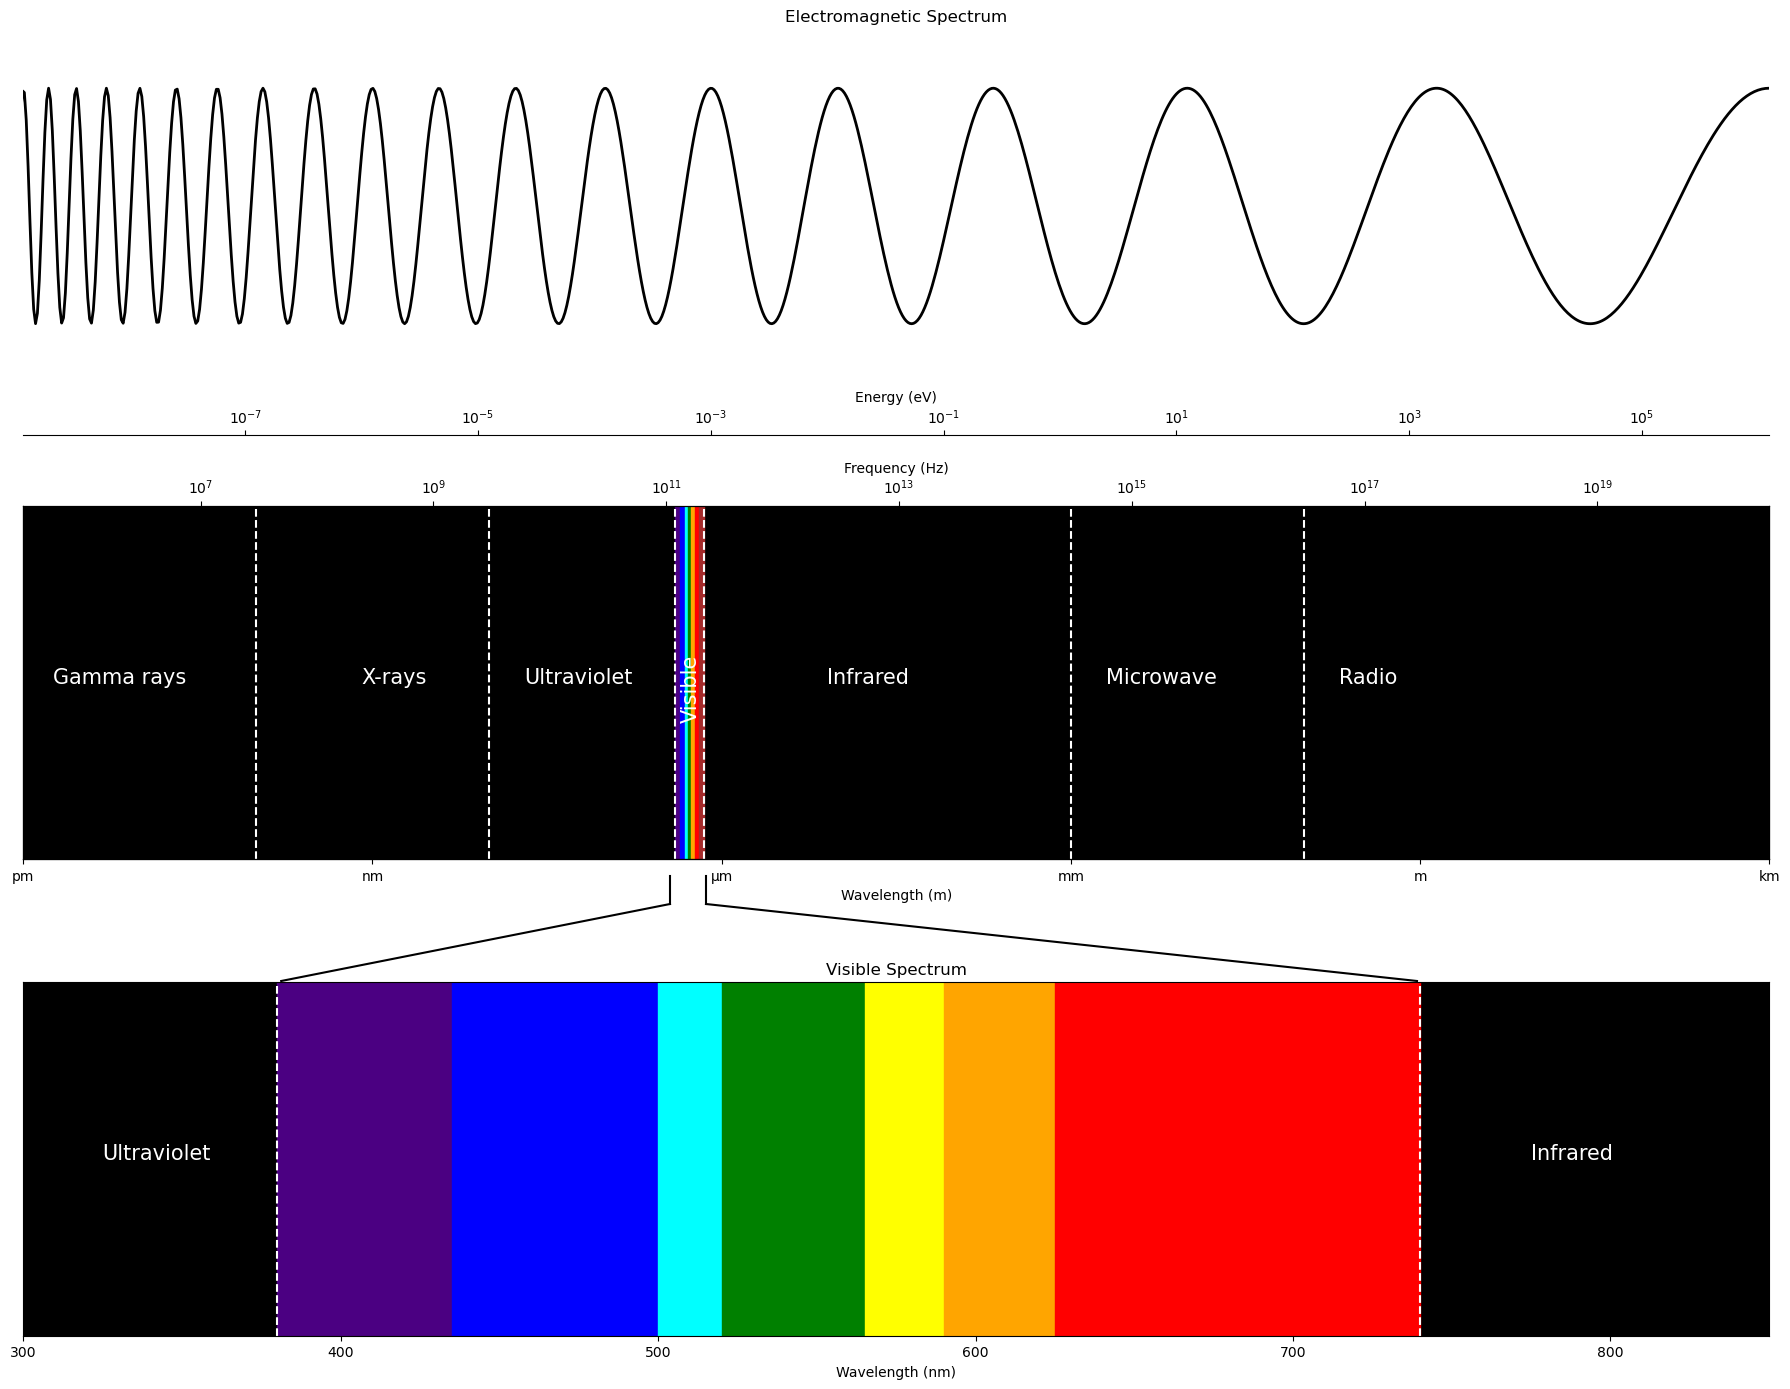

In [130]:
# Define constants used in calculations
h = sp.constants.Planck
c = sp.constants.speed_of_light
eV = sp.constants.electron_volt

#Define the wavelength, frequency, and energy arrays
wave = np.logspace(-12, 3, 500)
freq = c / wave
nrg = (h * c) / (wave * eV)

#Numbers used to plot the cos wave, equation used to plot the cos wave is from website [3]
min, max = 200, 1000
x = np.linspace(min, max, 1000)
wv = np.cos(10 * np.pi * x / (max+min-x))[::-1]

#Define the figure, plot the cos wave
fig = plt.figure(figsize=(18,14))
ax1 = fig.add_subplot(311)
ax1.plot(x, wv, c='black', lw=2)
ax1.set_xlim(250,1000)
ax1.set_ylim(-1.5,1.5)
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
ax1.axis('off')
ax1.set_title('Electromagnetic Spectrum')

#Define wavelength axis, ticks for units
ax2 = fig.add_subplot(312)
ax2.set_xscale('log')
ax2.set_xlabel('Wavelength (m)')
ax2.yaxis.set_visible(False)
ax2.set_xlim(1e-12, 1e3)
ax2.set_xticks([1e-12, 1e-9, 1e-6, 1e-3, 1, 1e3])
ax2.set_xticklabels(['pm', 'nm', 'µm', 'mm', 'm', 'km'])

#Plot the visible Em spectrum in the overall spectrum plot
ax2.axvspan(4e-7, 4.4e-7, color='indigo')
ax2.axvspan(4.4e-7, 4.8e-7, color='blue')
ax2.axvspan(4.8e-7, 5.1e-7, color='cyan')
ax2.axvspan(5.1e-7, 5.5e-7, color='green')
ax2.axvspan(5.5e-7, 5.9e-7, color='orange')
ax2.axvspan(5.9e-7, 6.4e-7, color='red')
ax2.axvspan(6.4e-7, 7e-7, color='brown')

#Label each region
ax2.text(1.8e-12, 0.5, 'Gamma rays', color='w', fontdict={'fontsize': 15})
ax2.text(0.8e-9, 0.5, 'X-rays', color='w', fontdict={'fontsize': 15})
ax2.text(2e-8, 0.5, 'Ultraviolet', color='w', fontdict={'fontsize': 15})
ax2.text(4.5e-7, 0.4, 'Visible', color='w', fontdict={'fontsize': 15},rotation=90)
ax2.text(8e-6, 0.5, 'Infrared', color='w', fontdict={'fontsize': 15})
ax2.text(2e-3, 0.5, 'Microwave', color='w', fontdict={'fontsize': 15})
ax2.text(0.2, 0.5, 'Radio', color='w', fontdict={'fontsize': 15})
ax2.set_facecolor('black')

#Plot dividing lines between regions
divlines = [1e-10, 1e-8, 4e-7, 7e-7, 1e-3, 1e-1]
for line in divlines:
    ax2.axvline(line, c='w', ls='--')

#Define the frequency axis
ax3 = ax2.twiny()
ax3.set_xscale('log')
ax3.set_xlim(c / 1e3, c / 1e-12)
ax3.set_xlabel('Frequency (Hz)')

#Define the energy axis
ax4 = ax2.twiny()
ax4.set_xscale('log')
ax4.set_xlim((h * c) / (1e3 * eV), (h * c) / (1e-12 * eV))
ax4.spines.top.set_position(('axes', 1.2))
ax4.set_xlabel('Energy (eV)')

#Add new subplot for zoomed in visible spectrum
ax5 = fig.add_subplot(313)
ax5.set_xscale('linear')
ax5.yaxis.set_visible(False)
ax5.set_xlim(300, 850)
ax5.set_title('Visible Spectrum')
ax5.set_xlabel('Wavelength (nm)')

#Add colors for each visible color 
ax5.set_facecolor('black')
ax5.axvspan(380, 435, color='indigo')
ax5.axvspan(435, 500, color='blue')
ax5.axvspan(500, 520, color='cyan')
ax5.axvspan(520, 565, color='green')
ax5.axvspan(565, 590, color='yellow')
ax5.axvspan(590, 625, color='orange')
ax5.axvspan(625, 740, color='red')

#Add lines for the visible spectrum
ax5.text(325, 0.5, 'Ultraviolet', color='w', fontdict={'fontsize': 15})
ax5.text(775, 0.5, 'Infrared', color='w', fontdict={'fontsize': 15})
ax5.axvline(380, c='w', ls='--')
ax5.axvline(740, c='w', ls='--')

#Add lines inbetween the subplots, and add to the figure
line1 = Line2D([0.375, 0.375], [0.37, 0.35], transform=fig.transFigure, color='black')
line2 = Line2D([0.395, 0.395], [0.37, 0.35], transform=fig.transFigure, color='black')
line3 = Line2D([0.375, 0.159], [0.35, 0.295], transform=fig.transFigure, color='black')
line4 = Line2D([0.395, 0.79], [0.35, 0.295], transform=fig.transFigure, color='black')
fig.add_artist(line1)
fig.add_artist(line2)
fig.add_artist(line3)
fig.add_artist(line4)

plt.tight_layout()
plt.show()

Websites used are inspiration/references: \
[1] https://www.thoughtco.com/the-visible-light-spectrum-2699036 \
[2] https://github.com/Pulsar7/Electromagnetic-Spectrum-Visualisation?tab=readme-ov-file \
[3] https://scipython.com/book/chapter-7-matplotlib/examples/a-depiction-of-the-electromagnetic-spectrum/ 

# Q2. Dealing with Data from Multiple Sources - adding passbands and atmospheric transmission (30 pts)

### 2.1
Get the Optical Atmospheric Transmission using the `specreduce` package
    `pip install specreduce`
    https://specreduce.readthedocs.io/en/latest/extinction.html

Note that the optical transmission curves do not include the effect of molecules as the website tells you.
Follow their instructions to add 2.3mm of Preciptiable Water Vapr at an Airmass of 1.0 to the optical transmission. 

Get NIR and MIR transmission curves from here (we're not using MIR this week, but you'll use this code next HW as well)
	http://www.gemini.edu/sciops/telescopes-and-sites/observing-condition-constraints/ir-transmission-spectra
(Cerro Pachon, 2.3mm of Precipitable Water Vapor, Airmass 1.0)


### 2.2
Get the LSST Filter Transmissions (ugrizy, filter only) from here:
http://svo2.cab.inta-csic.es/theory/fps3/index.php?mode=browse

and the IRTF (\[JHK\]_MK, filter only) transmissions from here:
https://irtfweb.ifa.hawaii.edu/~nsfcam2/Filter_Profiles.html

## !Please note that the filter tranmissions are determined by counting photons, not measuing energy! 

### 2.3

Finally, get the SEDs of three stars from CALSPEC:
https://www.stsci.edu/hst/instrumentation/reference-data-for-calibration-and-tools/astronomical-catalogs/calspec
and for the actual data:
https://archive.stsci.edu/hlsps/reference-atlases/cdbs/current_calspec/

(There is no M5V but there is a M3.5V star - BD-11 3759)


Finally, reconstruct a plot like this (set the wavelength ranges appropriately for the filters I've listed)
<img src="https://www.researchgate.net/profile/C-Chiosi/publication/1925441/figure/fig1/AS:339731901632519@1458009805844/The-filter-sets-used-in-the-present-work-From-top-to-bottom-we-show-the-filter-detector.png">

except replace the middle panel with the atmospheric transmission from your interpolator.

Something like this for the atmosphere plot (but until the wavelength you need): 
<img src="https://www.researchgate.net/profile/Joseph-Shaw-3/publication/260940640/figure/fig3/AS:296902361927680@1447798447054/Atmospheric-transmittance-versus-wavelength-calculated-with-Modtran5-for-a-zenith.png">

# Q3. Combine the filter transmission and your atmosphere transmission - we'll assume the mirror and CCDs are perfect over the entire wavelength range. Implement the integrals for flux and magnitude discussed in Lecture 3 as python code. (40 pts)

- You'll have to do something to `interpolate` measurements continuously across the full wavelength range you have across Optical to NIR (you can ignore the MIR file for now, but you'll want it next week)
- Make sure the units are consistent for both wavelength and transmission before you write your interpolator or address differences in some other way 
- You'll need to make sure your interpolator can match the wavelength spacing of the SEDs in Q2
- Rememeber that the intergrals intclude the transmission $T(\lambda)$, which is not normalized properly, so make sure to normalize your integral appropriately
- Normalize the synthetic flux in two ways
    1. such as Vega has magnitude 0 in each band.
    2. such that a synthetic AB source has magnitude 0 in each band

Report the magitudes of the Sun and BD-11 3759 in the Vega and AB system, and the AB magnitudes of Vega in a table (columns = passbands, rows = star/system)

- 15 pts each for the Sun and BD-11 3759 (2 pts for the six optical bands, 1 pt each for JHK) 
- 10 pts for the AB mags of Vega (yes, I know there are 9 bands, not 10, but you can have the one extra)

### Divide and conquer, so you encounter issues in parallel and can explain things to each other, rather than working in series. 

# Due Sep 17 at Noon!